In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df1 = pd.read_csv('Prueba_1.csv', sep=";", nrows=72)

df1.rename(columns={'DG por partido': 'DGpptdo'}, inplace=True)

df1

,Puesto,DGpptdo
0,1,5.88
1,2,0.88
2,3,0.50
3,4,0.13
4,5,1.17
...,...,...
67,8,-2.13
68,9,-1.83
69,10,-5.33
70,11,-2.17


In [86]:
df2 = pd.read_csv('Prueba_1.csv', sep=";", skiprows=72)

df2.rename(columns={'-4.83': 'DGpptdo'}, inplace=True)
df2.rename(columns={'12': 'Puesto'}, inplace=True)

df2

,Puesto,DGpptdo
0,1,3.00
1,2,5.38
2,3,2.00
3,4,0.13
4,5,2.88
...,...,...
67,8,1.83
68,9,0.00
69,10,-6.33
70,11,-5.00


In [9]:
y = df1.Puesto
x = df1.DGpptdo.values.reshape(-1, 1)
y2 = df2.Puesto
x2 = df2.DGpptdo.values.reshape(-1, 1)

print(x.shape,y.shape)
print(x2.shape,y2.shape)

(72, 1) (72,)
(72, 1) (72,)


0.6745918221937722
y = 6.5181 + -0.7682·x^1 + -0.0224·x^2
0.6683421970460182
y = 6.7660 + -0.6387·x^1 + -0.0143·x^2


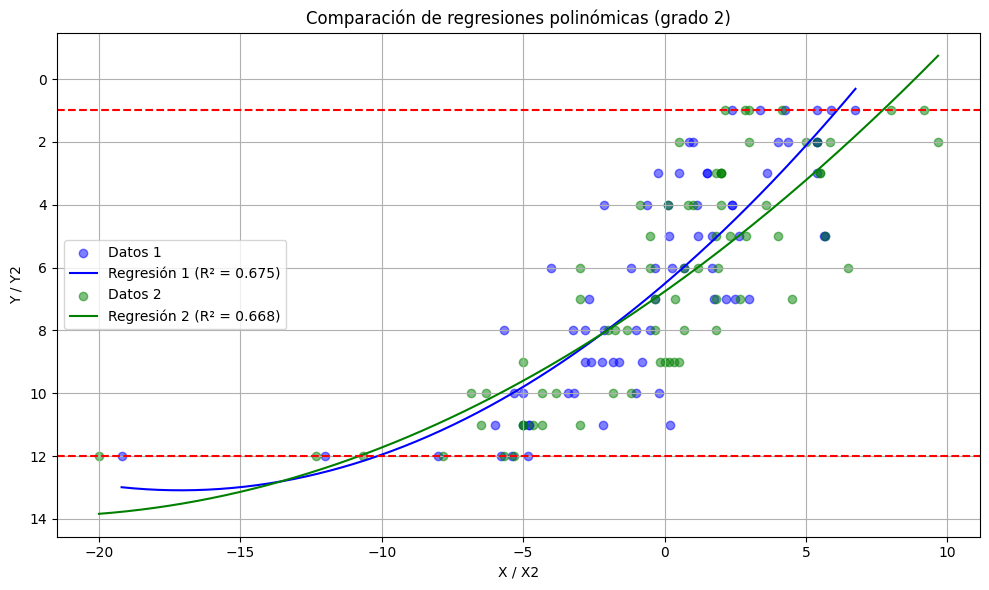

In [127]:
degree = 2

def print_polynomial_equation(model, poly):
    coefs = model.coef_
    intercept = model.intercept_
    terms = [f"{intercept:.4f}"]
    for i, coef in enumerate(coefs[1:], start=1):
        terms.append(f"{coef:.4f}·x^{i}")
    equation = " + ".join(terms)
    print(f"y = {equation}")

# Regresión 1 (x, y) 2004 - 2024
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))
model1 = LinearRegression().fit(X_poly, y)

r2_1 = model1.score(X_poly, y)
print(r2_1)

x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred1 = model1.predict(x_range_poly)

print_polynomial_equation(model1, poly)

# Regresión 2 (x2, y2) 1980 - 2000
X2_poly = poly.fit_transform(x2.reshape(-1, 1))
model2 = LinearRegression().fit(X2_poly, y2)

r2_2 = model2.score(X2_poly, y2)
print(r2_2)

x_range2 = np.linspace(x2.min(), x2.max(), 300).reshape(-1, 1)
x_range2_poly = poly.transform(x_range2)
y_pred2 = model2.predict(x_range2_poly)

print_polynomial_equation(model2, poly)

#Grafico de las regresiones
plt.figure(figsize=(10, 6))

# Datos y curvas
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos 1')
plt.plot(x_range, y_pred1, color='blue', label=f'Regresión 1 (R² = {r2_1:.3f})')

plt.scatter(x2, y2, color='green', alpha=0.5, label='Datos 2')
plt.plot(x_range2, y_pred2, color='green', label=f'Regresión 2 (R² = {r2_2:.3f})')

plt.xlabel("X / X2")
plt.ylabel("Y / Y2")
plt.axhline(y = 12, color='red', linestyle='dashed', xmax = 11)
plt.axhline(y = 1, color='red', linestyle='dashed', xmax = 11)
plt.title(f"Comparación de regresiones polinómicas (grado {degree})")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

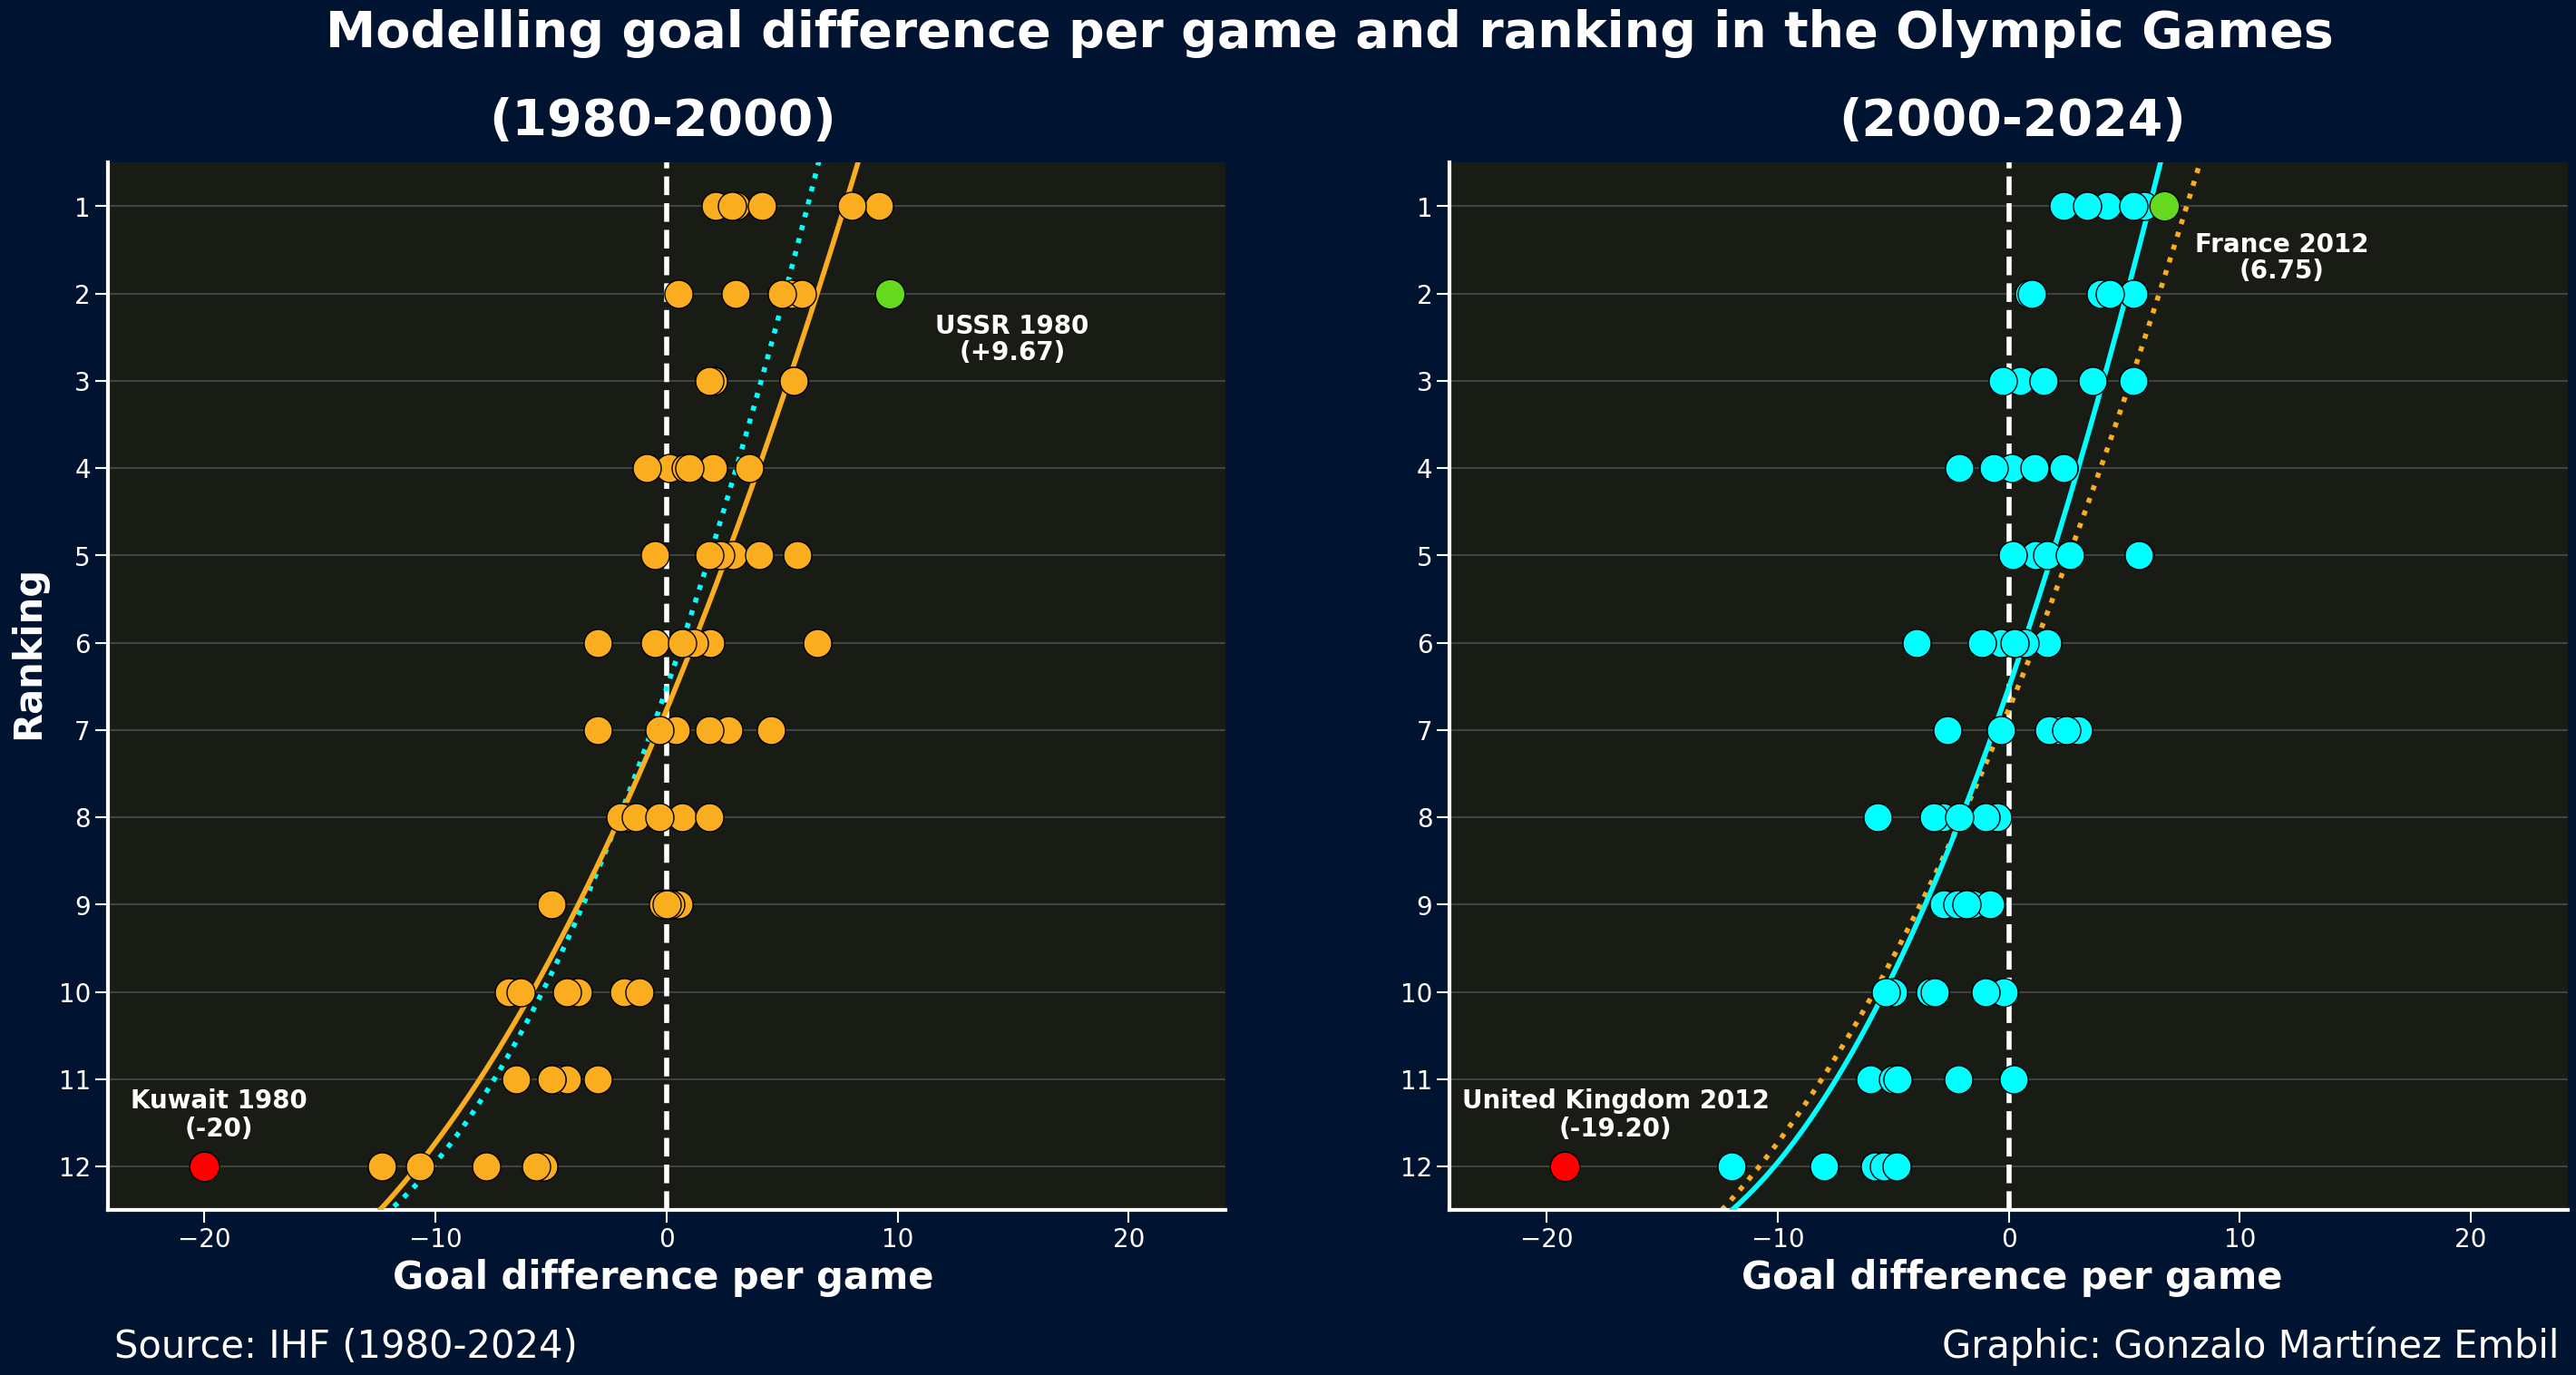

In [134]:
# Gráfico
fig, axs = plt.subplots(1,2)
fig.set_size_inches(35,15)
fig.set_facecolor('#001432')
axs[0].set_facecolor('#191c15')
axs[1].set_facecolor('#191c15')

# Puntos
axs[0].scatter(x2, y2, marker='o', color='#faad1e', label='1980-2000', edgecolors = 'black', linewidths = 1, s=500, zorder=4)
axs[1].scatter(x, y, marker='o', color='aqua', label='2000-2024', edgecolors = 'black', linewidths = 1, s=500, zorder=4)

# Línea de regresión
axs[0].plot(x_range2, y_pred2, color='#faad1e', label=f'Regresión 2 (R² = {r2_2:.3f})', linewidth=4, zorder=3)
axs[0].plot(x_range, y_pred1, color='aqua', label=f'Regresión 1 (R² = {r2_1:.3f})', linewidth=4, zorder=2, linestyle='dotted')
axs[1].plot(x_range2, y_pred2, color='#faad1e', label=f'Regresión 2 (R² = {r2_2:.3f})', linewidth=4, zorder=2, linestyle='dotted')
axs[1].plot(x_range, y_pred1, color='aqua', label=f'Regresión 1 (R² = {r2_1:.3f})', linewidth=4, zorder=3)

# Grid
axs[0].grid(axis='y', alpha=1, linewidth=0.25, color='white', zorder=1)
axs[1].grid(axis='y', alpha=1, linewidth=0.25, color='white', zorder=1)

# Ejes
axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].set_yticks([i for i in range(1, 25)])
axs[1].set_yticks([i for i in range(1, 25)])
axs[0].set_ylim(12.5, 0.5)
axs[1].set_ylim(12.5, 0.5)
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

# Línea de corte
axs[0].axvline(x = 0, color='white', linestyle='dashed', ymax = 1, zorder=0, linewidth=4)
axs[0].axvline(x = 22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
axs[0].axvline(x = -22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
axs[1].axvline(x = 0, color='white', linestyle='dashed', ymax = 1, zorder=0, linewidth=4)
axs[1].axvline(x = 22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
axs[1].axvline(x = -22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)

# Label
axs[0].tick_params(colors='white', length=10, width=1.5, which='both')
axs[1].tick_params(colors='white', length=10, width=1.5, which='both')

# Borders
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
for axis in ['bottom', 'left']:
  axs[0].spines[axis].set_color('white')
  axs[0].spines[axis].set_linewidth(3)
  axs[0].spines[axis].set_zorder(2)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
for axis in ['bottom', 'left']:
  axs[1].spines[axis].set_color('white')
  axs[1].spines[axis].set_linewidth(3)
  axs[1].spines[axis].set_zorder(2)

# Puntos máximos
axs[0].scatter(9.67, 2,  marker='o', color='#65d91e', label='23/24', edgecolors = 'black', linewidths = 1, s=550, zorder=8)
fig.text(0.41, 0.76, 'USSR 1980', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.41, 0.74, '(+9.67)', ha='center', va='center', fontsize=20, color='white', weight='bold')
axs[0].scatter(-20, 12,  marker='o', color='red', label='23/24', edgecolors = 'black', linewidths = 1, s=550, zorder=8)
fig.text(0.16, 0.19, 'Kuwait 1980', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.16, 0.17, '(-20)', ha='center', va='center', fontsize=20, color='white', weight='bold')
axs[1].scatter(6.75, 1,  marker='o', color='#65d91e', label='23/24', edgecolors = 'black', linewidths = 1, s=550, zorder=8)
fig.text(0.81, 0.82, 'France 2012', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.81, 0.8, '(6.75)', ha='center', va='center', fontsize=20, color='white', weight='bold')
axs[1].scatter(-19.20, 12,  marker='o', color='red', label='23/24', edgecolors = 'black', linewidths = 1, s=550, zorder=8)
fig.text(0.6, 0.19, 'United Kingdom 2012', ha='center', va='center', fontsize=20, color='white', weight='bold')
fig.text(0.6, 0.17, '(-19.20)', ha='center', va='center', fontsize=20, color='white', weight='bold')

# Texto
fig.text(0.51,0.975, 'Modelling goal difference per game and ranking in the Olympic Games', ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.3,0.91, '(1980-2000)', ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.725,0.91, '(2000-2024)', ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.2, 0.01, 'Source: IHF (1980-2024)', ha='center', va='center', fontsize=30, color='white')
fig.text(0.3, 0.06, 'Goal difference per game', ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.725, 0.06, 'Goal difference per game', ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.8, 0.01, 'Graphic: Gonzalo Martínez Embil', ha='center', va='center', fontsize=30, color='white')
fig.text(0.1, 0.52, 'Ranking', rotation=90, ha='center', va='center', fontsize=30, color='white', weight='bold')

fig.savefig('Modelling goal difference per game and ranking in the Olympic Games.png', dpi=200, bbox_inches='tight', pad_inches=1)

plt.show()